Generated points:
[[ 0.2152799  -0.68209328]
 [-0.60077413 -0.47955381]
 [ 0.50182508  0.08004567]
 ...
 [ 0.2786712  -0.28096541]
 [ 0.53120892 -0.39875293]
 [ 0.4333838  -0.042555  ]]
grid setup time: 0.0005006790161132812 seconds
indices:
[   97   158   204 ... 99779 99803 99813]
starts, counts:
[    0   965   965   973  1938  1012  2950   977  3927  1004  4931  1047
  5978  1029  7007  1042  8049   970  9019   991 10010  1027 11037   967
 12004  1017 13021   996 14017   983 15000   940 15940   937 16877   973
 17850   985 18835  1012 19847   947 20794   977 21771   986 22757  1070
 23827   951 24778  1014 25792  1039 26831   968 27799   998 28797  1006
 29803  1027 30830  1008 31838   996 32834   993 33827  1047 34874   976
 35850  1014 36864  1035 37899  1007 38906   962 39868  1047 40915  1005
 41920  1014 42934  1071 44005   993 44998   964 45962  1012 46974   978
 47952  1009 48961  1054 50015  1086 51101   947 52048   949 52997   978
 53975  1014 54989  1026 56015  1019 57034 

C:\Users\Milan\AppData\Local\Temp\ipykernel_9084\764822206.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(points[:, 0], points[:, 1],
C:\Users\Milan\AppData\Local\Temp\ipykernel_9084\764822206.py:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


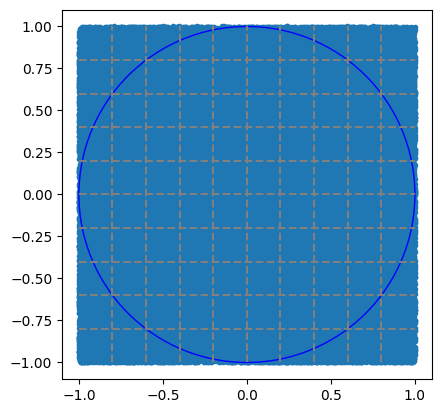

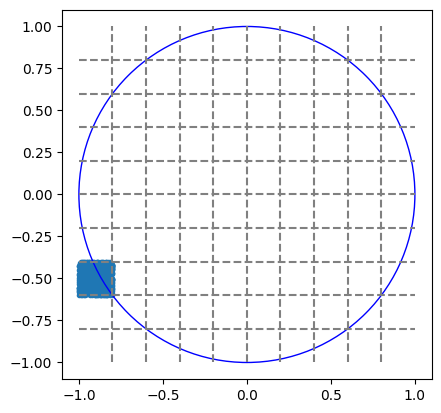

In [5]:
import hyperbolicTSNE.uniform_grid as grid
import numpy as np
from matplotlib import pyplot as plt
import time

def generate_points(n):
    # Generate random x and y coordinates in the range (-1, 1)
    x_coordinates = np.random.uniform(-1, 1, n)
    y_coordinates = np.random.uniform(-1, 1, n)
    
    # Combine x and y coordinates into a single array of points
    points = np.column_stack((x_coordinates, y_coordinates))
    
    return points

def plot_poincare(points, grid_size, labels=None):
    fig, ax = plt.subplots()
    

    ax.scatter(points[:, 0], points[:, 1],
               c=labels,
               marker=".",
               cmap="tab10")
    
    # Draw grid lines
    for i in range(1, grid_size):
        x = np.linspace(-1, 1, 100)
        y = np.ones_like(x) * (-1 + 2 * i / grid_size)
        ax.plot(x, y, color='gray', linestyle='--')
        ax.plot(y, x, color='gray', linestyle='--')

    ax.add_patch(plt.Circle((0, 0), radius=1, edgecolor="b", facecolor="None"))
    ax.axis("square")
    fig.show()
    #fig.savefig(f"results/{dataset.name}.png")

def get_points_in_grid(points, indices, starts_counts, grid_index):
    start = starts_counts[grid_index*2]
    stride = starts_counts[grid_index*2+1]
    return points[indices[start : start+stride]]

# Example usage:
n = 100000
points = generate_points(n)
print("Generated points:")
print(points)

grid_size = 10

start_time = time.time()

result_indices, result_starts_counts = grid.divide_points_over_grid(points, grid_size)

end_time = time.time()

execution_time = end_time - start_time
print("grid setup time:", execution_time, "seconds")


#grid.divide_points_over_grid(points, grid_size)
print("indices:")
print(result_indices)
print("starts, counts:")
print(result_starts_counts)

plot_poincare(points, grid_size)
plot_poincare(get_points_in_grid(points, result_indices, result_starts_counts, 2), grid_size)
